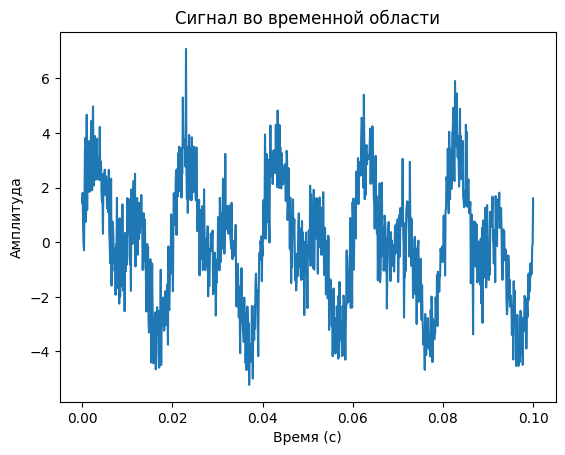

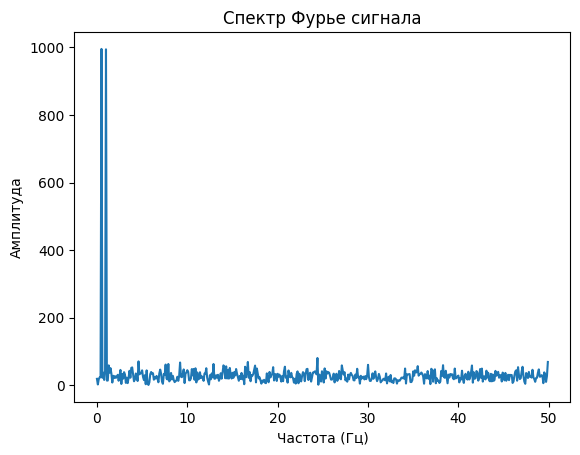

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq

def signal(x, A=2.0, f=[50, 100], eps=None):
    sig = sum(A * np.sin(x * fr * 2 * np.pi) for fr in f)
    
    if eps:
        sig += eps * np.random.normal(0, 1, len(sig))

    return sig

x = np.linspace(0, 1 / 50 * 5, 1000)
y = signal(x, eps=1)

f = fftfreq(len(y), d=1 / 100)
y_f = fft(y)

plt.plot(x, y)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал во временной области')
plt.show()

plt.plot(f[:len(f)//2], np.abs(y_f[:len(y_f)//2])) 
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр Фурье сигнала')
plt.show()


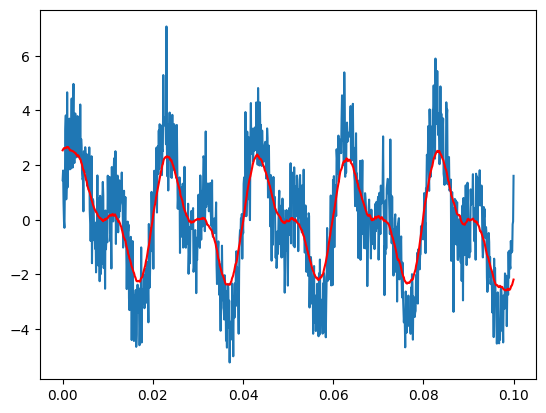

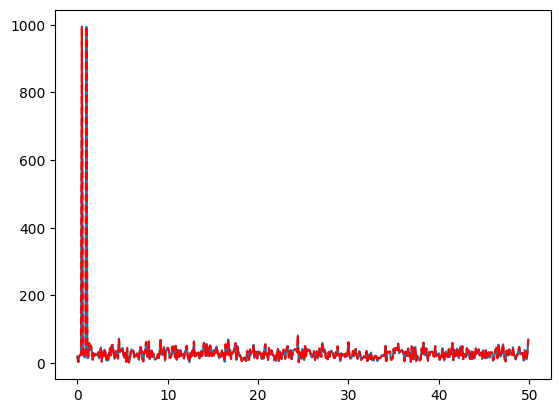

In [36]:
def moving_average(y, k=5):
    n = len(y)
    y_avg = np.zeros(n)

    for t in range(n):
        start = max(0, t - k)
        end = min(n, t + k + 1)

        y_avg[t] = np.mean(y[start:end])

    return y_avg

y_avg = moving_average(y, k=30)

plt.plot(x, y)
plt.plot(x, y_avg, color='red')

plt.show()

plt.plot(f[:len(f)//2], np.abs(y_f[:len(y)//2]))
plt.plot(f[:len(f)//2], np.abs(y_f[:len(y_f)//2]), color='red', linestyle='--') 
plt.show()

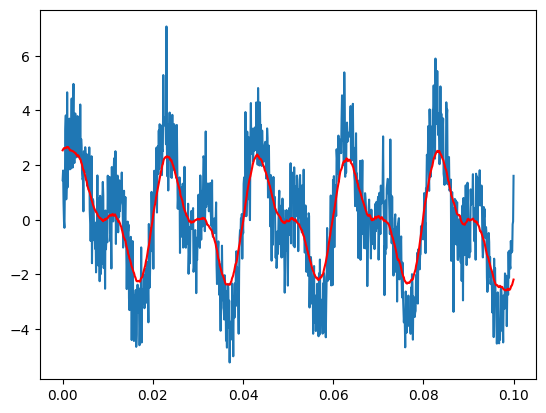

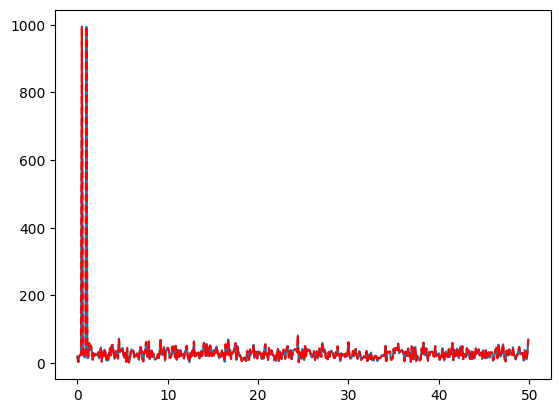

In [40]:
def gauss_average(y, k=5):
    def g(x, w=1.0):
        return np.exp(-4 * np.log2(x**2) / w**2)
    
    n = len(y)
    y_avg = np.zeros(n)

    for t in range(n):
        start = max(0, t - k)
        end = min(n, t + k + 1)

        y_avg[t] = np.mean(y[start:end])

    return y_avg


y_avg = gauss_average(y, k=30)

plt.plot(x, y)
plt.plot(x, y_avg, color='red')

plt.show()

plt.plot(f[:len(f)//2], np.abs(y_f[:len(y)//2]))
plt.plot(f[:len(f)//2], np.abs(y_f[:len(y_f)//2]), color='red', linestyle='--') 
plt.show()


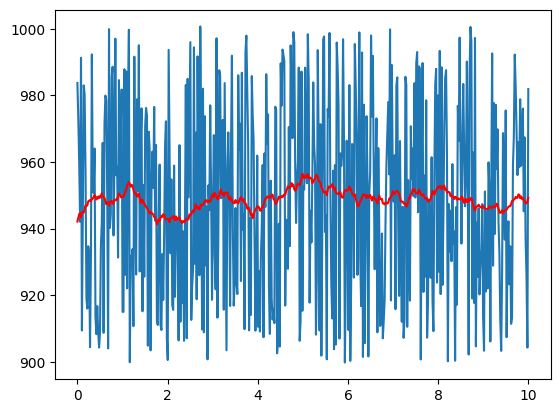

In [58]:
x = np.linspace(0, 10, 500)
y = np.sin(x * 3) + (np.random.uniform(900, 1000, len(x)))

y_avg = gauss_average(y, k=30)

plt.plot(x, y)
plt.plot(x, y_avg, color='red')

plt.show()

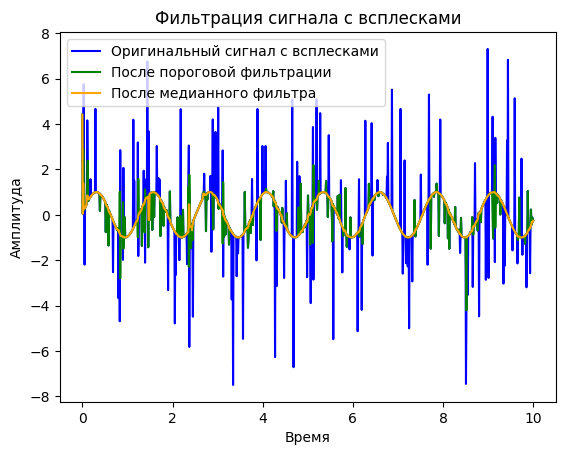

In [60]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.linspace(0, 10, 1000)
y = np.sin(x * 5) 

random_spikes = np.random.normal(scale=2.5, size=x.size) * (np.random.rand(len(x)) > 0.8)
y += random_spikes

def threshold_filter(signal, threshold):
    filtered_signal = signal.copy()
    for i in range(1, len(signal) - 1):
        if abs(signal[i]) > threshold:
            filtered_signal[i] = (signal[i - 1] + signal[i + 1]) / 2
    return filtered_signal

def median_filter(signal, window_size):
    filtered_signal = signal.copy()
    half_window = window_size // 2
    for i in range(half_window, len(signal) - half_window):
        filtered_signal[i] = np.median(signal[i - half_window : i + half_window + 1])
    return filtered_signal

threshold = 1.5  
y_thresholded = threshold_filter(y, threshold)

window_size = 5  
y_median_filtered = median_filter(y_thresholded, window_size)

plt.plot(x, y, label='Оригинальный сигнал с всплесками', color='blue')
plt.plot(x, y_thresholded, label='После пороговой фильтрации', color='green')
plt.plot(x, y_median_filtered, label='После медианного фильтра', color='orange')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.title('Фильтрация сигнала с всплесками')
plt.legend()
plt.show()


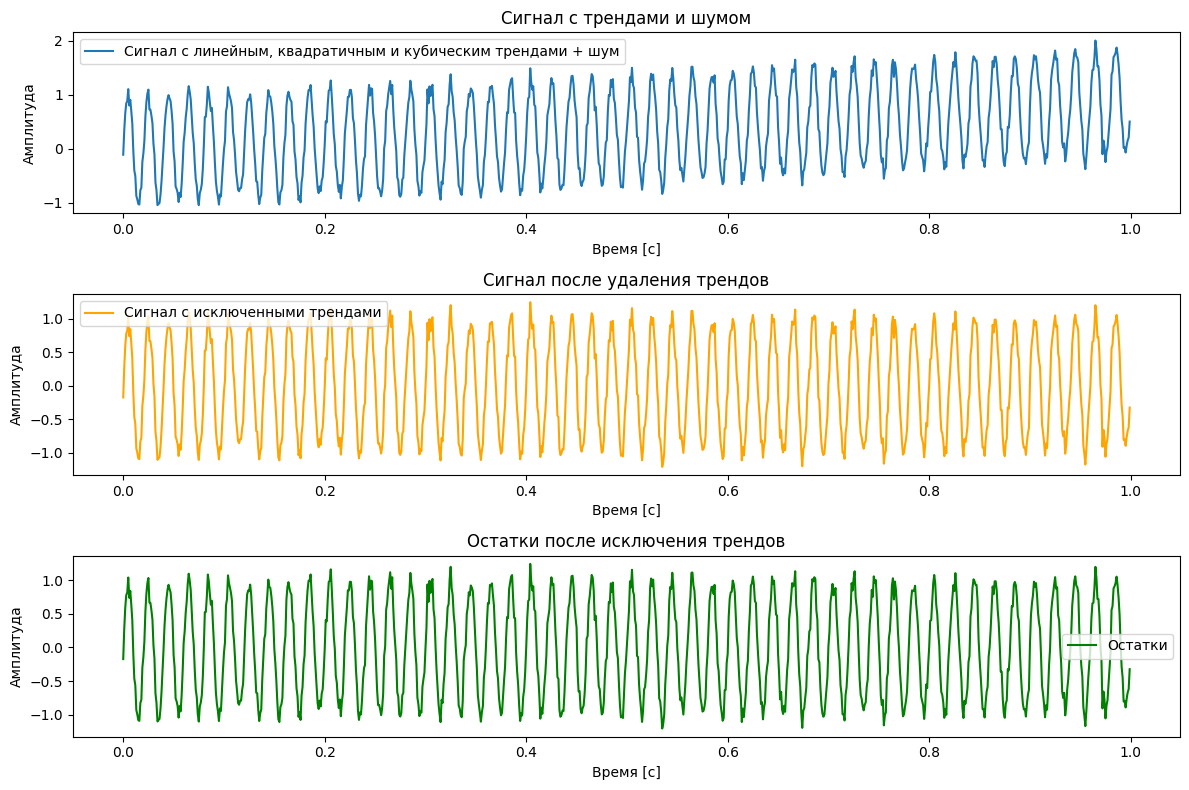

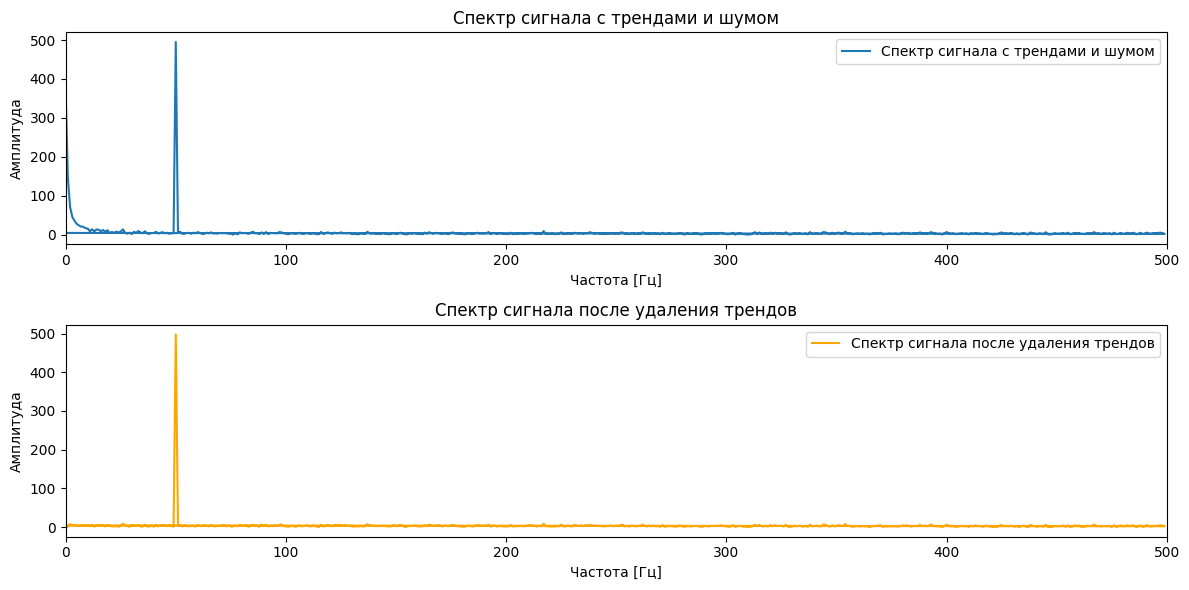

BIC: 7639.435353076415


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000
t = np.arange(0, 1, 1 / fs)

f = 50
signal = np.sin(2 * np.pi * f * t)
trend = 0.5 * t + 0.3 * t**2 + 0.1 * t**3
noisy_signal = signal + trend + np.random.normal(0, 0.1, len(t))

def polynomial_regression(x, y, degree):
    coeffs = np.polyfit(x, y, degree)
    fit_func = np.poly1d(coeffs)
    return fit_func(x), coeffs

degree = 3
trend_fit, _ = polynomial_regression(t, noisy_signal, degree)
detrended_signal = noisy_signal - trend_fit

def calculate_bic(n, k, log_likelihood):
    return n * np.log(k) + k * np.log(n) - 2 * log_likelihood

n = len(t)
k = degree + 1
residuals = noisy_signal - trend_fit
log_likelihood = -0.5 * n * np.log(np.sum(residuals ** 2))
bic = calculate_bic(n, k, log_likelihood)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, noisy_signal, label='Сигнал с линейным, квадратичным и кубическим трендами + шум')
plt.title('Сигнал с трендами и шумом')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, detrended_signal, label='Сигнал с исключенными трендами', color='orange')
plt.title('Сигнал после удаления трендов')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, residuals, label='Остатки', color='green')
plt.title('Остатки после исключения трендов')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.legend()

plt.tight_layout()

def compute_spectrum(signal, fs):
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1 / fs)
    spectrum = np.abs(np.fft.fft(signal))
    return freq, spectrum

freq_noisy, spectrum_noisy = compute_spectrum(noisy_signal, fs)
freq_detrended, spectrum_detrended = compute_spectrum(detrended_signal, fs)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq_noisy, spectrum_noisy, label='Спектр сигнала с трендами и шумом')
plt.title('Спектр сигнала с трендами и шумом')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
plt.xlim(0, fs / 2)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(freq_detrended, spectrum_detrended, label='Спектр сигнала после удаления трендов', color='orange')
plt.title('Спектр сигнала после удаления трендов')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
plt.xlim(0, fs / 2)
plt.legend()

plt.tight_layout()

plt.show()

print(f'BIC: {bic}')
